<a href="https://colab.research.google.com/github/nhatnguyen3104/BaiTapLonCstts/blob/main/Bai_tap_lon_cstts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

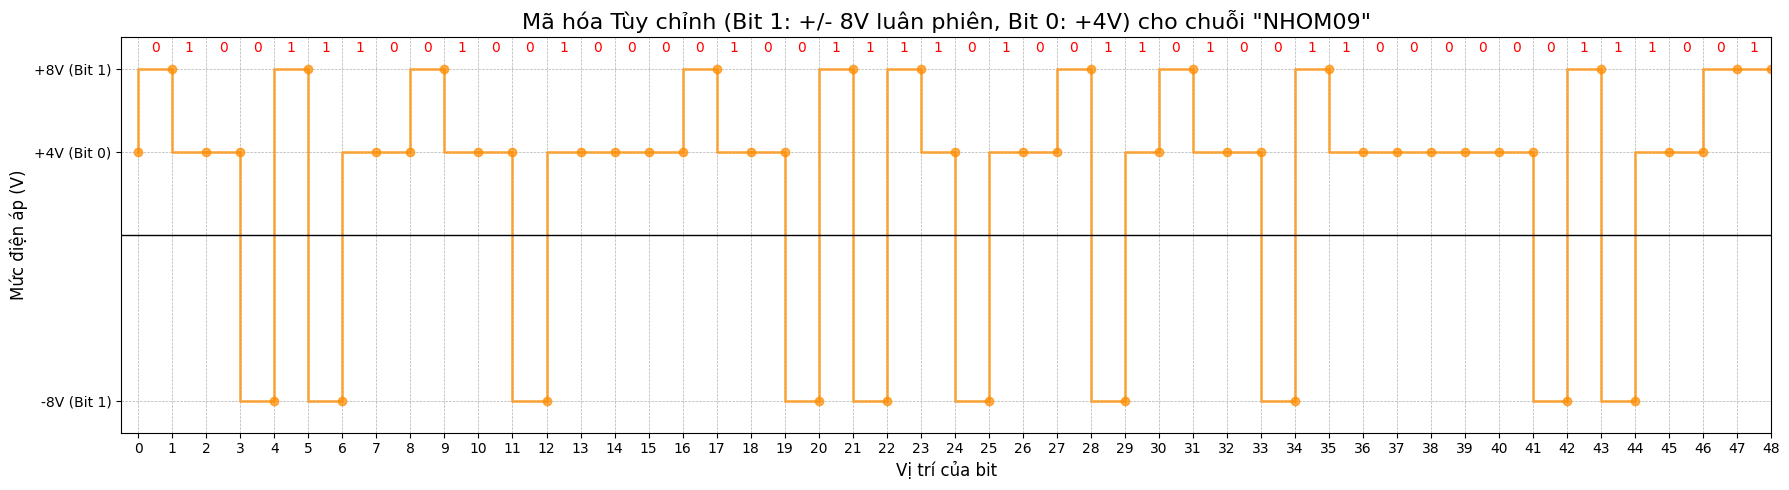

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def plot_custom_ami_encoding(text_string):
    """
    Hàm này chuyển đổi một chuỗi ký tự sang nhị phân và vẽ biểu đồ mã hóa
    AMI TÙY CHỈNH: Bit 1 là +/- 8V (luân phiên), Bit 0 là +4V.
    """
    # 1. Chuyển đổi chuỗi ký tự sang chuỗi nhị phân (8 bit/ký tự)
    binary_string = ''.join(format(ord(char), '08b') for char in text_string)

    # 2. Áp dụng quy tắc mã hóa TÙY CHỈNH (AMI-like 8V/4V)
    custom_ami_signal = []
    # Dùng +/- 8V cho Bit 1
    # Chỉ đảo dấu khi gặp Bit 1
    voltage_sign = 8  # Bắt đầu với xung dương (+8V) cho bit '1' đầu tiên

    for bit in binary_string:
        if bit == '1':
            # Bit '1' (Mark): luân phiên +8V và -8V
            custom_ami_signal.append(voltage_sign)
            voltage_sign *= -1  # Đảo ngược điện áp cho bit '1' tiếp theo
        else:
            # Bit '0' (Space): Giữ nguyên +4V
            custom_ami_signal.append(4)

    # 3. Chuẩn bị dữ liệu để vẽ đồ thị
    # Vector thời gian/vị trí bit
    t = np.arange(len(custom_ami_signal) + 1)
    # Lặp lại điện áp cuối cùng để steps-pre vẽ đúng
    y = np.append(custom_ami_signal, custom_ami_signal[-1])

    # 4. Vẽ đồ thị
    plt.figure(figsize=(18, 5))

    # Dùng plt.step để vẽ xung vuông
    plt.step(t, y, where='pre', marker='o', color='darkorange', alpha=0.7, linewidth=2)

    # Thiết lập các đường lưới và trục
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.axhline(0, color='black', linewidth=1)

    # Thiết lập nhãn trục Y: -8V, 4V, +8V
    plt.yticks([-8, 4, 8], ['-8V (Bit 1)', '+4V (Bit 0)', '+8V (Bit 1)'])
    plt.xticks(np.arange(len(binary_string) + 1))

    # Thiết lập giới hạn trục
    plt.xlim(-0.5, len(binary_string))
    plt.ylim(-9.5, 9.5) # Đủ chỗ cho +/- 8V và nhãn

    # Thêm nhãn bit nhị phân lên trên đồ thị (Đặt ở mức cao nhất 9V)
    for i, bit in enumerate(binary_string):
        plt.text(i + 0.5, 9, bit, ha='center', va='center', fontsize=10, color='red')

    # Thiết lập tiêu đề và nhãn
    plt.title(f'Mã hóa Tùy chỉnh (Bit 1: +/- 8V luân phiên, Bit 0: +4V) cho chuỗi "{text_string}"', fontsize=16)
    plt.xlabel("Vị trí của bit", fontsize=12)
    plt.ylabel("Mức điện áp (V)", fontsize=12)

    # Hiển thị đồ thị
    plt.tight_layout()
    plt.show()

# Chuỗi ký tự cần mã hóa
input_string = "NHOM09"
plot_custom_ami_encoding(input_string)

Nhập số lượng ký tự n (n > 0): 6
Nhập chuỗi ký tự: NHOM09

Ma trận các ký tự đã mã hóa thành dãy bit:
[[0 1 0 0 1 1 1 0]
 [0 1 0 0 1 0 0 0]
 [0 1 0 0 1 1 1 1]
 [0 1 0 0 1 1 0 1]
 [0 0 1 1 0 0 0 0]
 [0 0 1 1 1 0 0 1]]

Kiểm tra tính hợp lệ (chẵn lẻ) cho hàng và cột:
Ký tự "N": hàng có tổng bit "1" là 4 (Pr = 0)
Ký tự "H": hàng có tổng bit "1" là 2 (Pr = 0)
Ký tự "O": hàng có tổng bit "1" là 5 (Pr = 1)
Ký tự "M": hàng có tổng bit "1" là 4 (Pr = 0)
Ký tự "0": hàng có tổng bit "1" là 2 (Pr = 0)
Ký tự "9": hàng có tổng bit "1" là 4 (Pr = 0)
Cột 1: có tổng bit "1" là 0 (Pc = 1)
Cột 2: có tổng bit "1" là 4 (Pc = 1)
Cột 3: có tổng bit "1" là 2 (Pc = 1)
Cột 4: có tổng bit "1" là 2 (Pc = 1)
Cột 5: có tổng bit "1" là 5 (Pc = 0)
Cột 6: có tổng bit "1" là 3 (Pc = 0)
Cột 7: có tổng bit "1" là 2 (Pc = 1)
Cột 8: có tổng bit "1" là 3 (Pc = 0)

BCC = :
[[0 1 0 0 1 1 1 0 0]
 [0 1 0 0 1 0 0 0 0]
 [0 1 0 0 1 1 1 1 1]
 [0 1 0 0 1 1 0 1 0]
 [0 0 1 1 0 0 0 0 0]
 [0 0 1 1 1 0 0 1 0]
 [1 1 1 1 0 0 1 0 0]]

Chuỗ

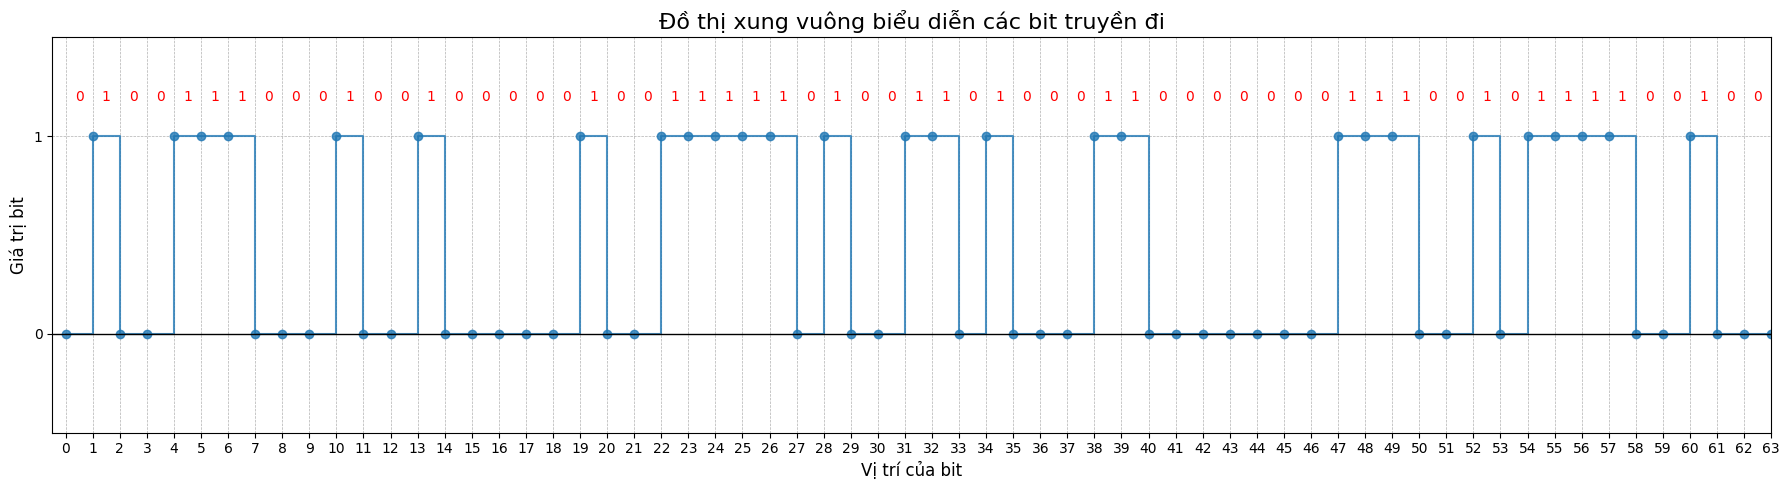

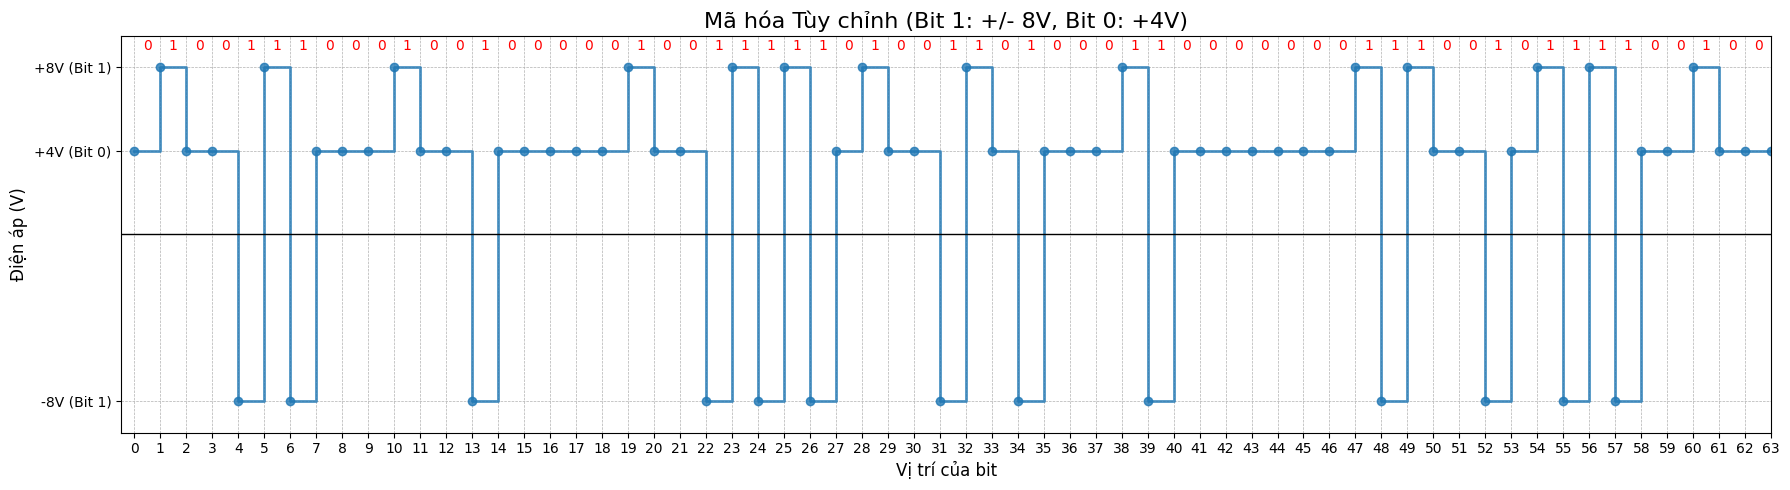

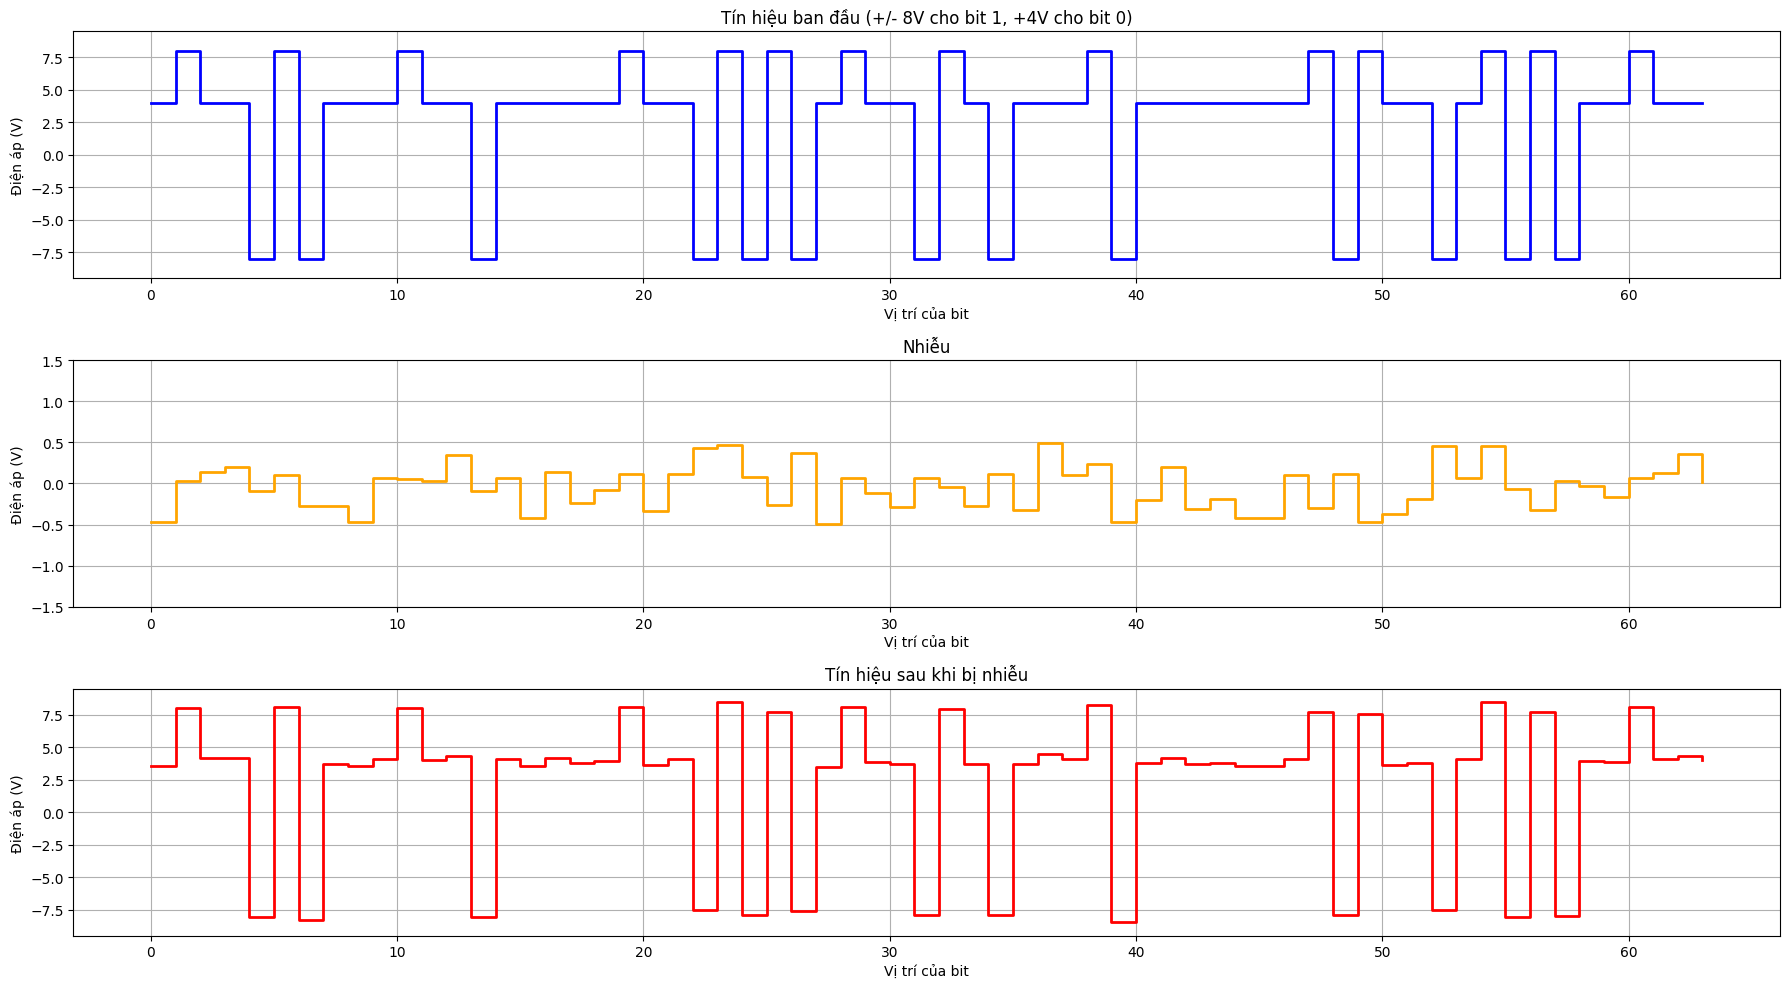

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Hàm main để chạy chương trình
def main():
    # 1. Nhập và kiểm tra n
    while True:
        try:
            n = int(input('Nhập số lượng ký tự n (n > 0): '))
            if n > 0:
                break
            else:
                print('Giá trị n không hợp lệ. Nhập lại n.')
        except ValueError:
            print('Đầu vào không phải là số. Nhập lại n.')

    # 2. Nhập chuỗi ký tự
    chuoi = input('Nhập chuỗi ký tự: ')

    if not chuoi:
        print("Chuỗi rỗng, kết thúc chương trình.")
        return

    # 3. Mã hóa chuỗi thành ma trận bit (ASCII 8-bit)
    ascii_values = [ord(c) for c in chuoi]
    chuoi_bin_list = [np.binary_repr(val, width=8) for val in ascii_values]
    chuoi_bin_str = "".join(chuoi_bin_list)
    matran = np.array([int(bit) for bit in chuoi_bin_str], dtype=int).reshape(-1, 8)
    row, col = matran.shape

    print('\nMa trận các ký tự đã mã hóa thành dãy bit:')
    print(matran)

    # 4. Tính toán Bit kiểm tra chẵn lẻ (BCC logic giữ nguyên)
    hang_parity = np.mod(np.sum(matran, axis=1), 2)
    cot_parity_ng = np.mod(np.sum(matran, axis=0) + 1, 2)

    print('\nKiểm tra tính hợp lệ (chẵn lẻ) cho hàng và cột:')
    for i in range(row):
        bit_sum = np.sum(matran[i, :] == 1)
        print(f'Ký tự "{chuoi[i]}": hàng có tổng bit "1" là {bit_sum} (Pr = {hang_parity[i]})')
    for j in range(col):
        bit_sum = np.sum(matran[:, j] == 1)
        print(f'Cột {j+1}: có tổng bit "1" là {bit_sum} (Pc = {cot_parity_ng[j]})')

    # 5. Xây dựng ma trận BCC
    matran_moi = np.hstack([matran, hang_parity.reshape(-1, 1)])
    cot_parity_moi = np.append(cot_parity_ng, 0)
    matran_moi = np.vstack([matran_moi, cot_parity_moi])
    matran_moi[-1, -1] = 0

    print('\nBCC = :')
    print(matran_moi)

    # 6. Chuỗi bit truyền đi
    hang_truyen = matran_moi.flatten()

    print('\nChuỗi bit sau khi nối các hàng và truyền đi:')
    hang_truyen_str = ''.join(map(str, hang_truyen))
    print(hang_truyen_str)

    # 7. Vẽ đồ thị xung vuông biểu diễn các bit truyền đi (Giá trị 0/1)
    t = np.arange(len(hang_truyen) + 1)
    y_bit_plot = np.append(hang_truyen, hang_truyen[-1])

    plt.figure(figsize=(18, 5))
    plt.step(t, y_bit_plot, where='post', linewidth=1.5, marker='o', alpha=0.8)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.axhline(0, color='black', linewidth=1)
    plt.yticks([0, 1], ['0', '1'])
    plt.xticks(np.arange(len(hang_truyen) + 1))
    plt.xlim(-0.5, len(hang_truyen))
    plt.ylim(-0.5, 1.5)

    for i, bit in enumerate(hang_truyen_str):
        plt.text(i + 0.5, 1.2, bit, ha='center', va='center', fontsize=10, color='red')

    plt.title(f'Đồ thị xung vuông biểu diễn các bit truyền đi', fontsize=16)
    plt.xlabel("Vị trí của bit", fontsize=12)
    plt.ylabel("Giá trị bit", fontsize=12)
    plt.tight_layout()

    # ==========================================================
    # 8. MÃ HÓA TÙY CHỈNH: Bit 1 là +/- 8V, Bit 0 là +4V
    # ==========================================================

    dien_ap_tuy_chinh = np.zeros_like(hang_truyen, dtype=float)
    voltage_sign = 1 # Bắt đầu với dấu dương (+8V)

    for i in range(len(hang_truyen)):
        if hang_truyen[i] == 1:
            dien_ap_tuy_chinh[i] = voltage_sign * 8 # Bit 1: luân phiên +8V và -8V
            voltage_sign *= -1 # Đảo dấu cho bit 1 tiếp theo
        else: # hang_truyen[i] == 0
            dien_ap_tuy_chinh[i] = 4 # Bit 0: +4V

    y_dienap_tuy_chinh = np.append(dien_ap_tuy_chinh, dien_ap_tuy_chinh[-1])

    plt.figure(figsize=(18, 5))

    # Vẽ đồ thị mã hóa tùy chỉnh
    plt.step(t, y_dienap_tuy_chinh, where='post', linewidth=2, marker='o', alpha=0.8)

    # Thiết lập các đường lưới và trục
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.axhline(0, color='black', linewidth=1)

    # Điều chỉnh trục Y cho phù hợp với mức điện áp -8V, 4V, +8V
    plt.yticks([-8, 4, 8], ['-8V (Bit 1)', '+4V (Bit 0)', '+8V (Bit 1)'])
    plt.xticks(np.arange(len(hang_truyen) + 1))
    plt.xlim(-0.5, len(hang_truyen))
    plt.ylim(-9.5, 9.5)

    # Thêm nhãn bit nhị phân lên trên đồ thị
    for i, bit in enumerate(hang_truyen_str):
        # Đặt bit ở giữa khoảng thời gian (i + 0.5) và cao hơn (ví dụ: 9)
        plt.text(i + 0.5, 9, bit, ha='center', va='center', fontsize=10, color='red')

    # Thiết lập tiêu đề và nhãn
    plt.title(f'Mã hóa Tùy chỉnh (Bit 1: +/- 8V, Bit 0: +4V)', fontsize=16)
    plt.xlabel("Vị trí của bit", fontsize=12)
    plt.ylabel("Điện áp (V)", fontsize=12)

    plt.tight_layout()

    # 9. Mô phỏng nhiễu và Phục hồi dữ liệu

    while True:
        try:
            Nmax = float(input('\nNhập giá trị Nmax: '))
            N = float(input('Nhập giá trị N (mức nhiễu): '))
            break
        except ValueError:
            print('Giá trị nhập vào không hợp lệ. Vui lòng nhập số.')

    # Tạo nhiễu ngẫu nhiên
    nhieu = -N + 2 * N * np.random.rand(len(y_dienap_tuy_chinh))
    y_nhieu = y_dienap_tuy_chinh + nhieu

    # 10. Vẽ đồ thị 3 tầng

    plt.figure(figsize=(18, 10))

    plt.subplot(3, 1, 1)
    plt.step(t, y_dienap_tuy_chinh, where='post', linewidth=2, color='b')
    plt.ylim([-9.5, 9.5])
    plt.title('Tín hiệu ban đầu (+/- 8V cho bit 1, +4V cho bit 0)')
    plt.xlabel('Vị trí của bit')
    plt.ylabel('Điện áp (V)')
    plt.grid(True)

    plt.subplot(3, 1, 2)
    plt.step(t, nhieu, where='post', linewidth=2, color='orange')
    plt.ylim([-N - 1, N + 1])
    plt.title('Nhiễu')
    plt.xlabel('Vị trí của bit')
    plt.ylabel('Điện áp (V)')
    plt.grid(True)

    plt.subplot(3, 1, 3)
    plt.step(t, y_nhieu, where='post', linewidth=2, color='r')
    plt.ylim([-9.5, 9.5])
    plt.title('Tín hiệu sau khi bị nhiễu')
    plt.xlabel('Vị trí của bit')
    plt.ylabel('Điện áp (V)')
    plt.grid(True)

    plt.tight_layout()

    # 11. Phục hồi chuỗi bit (Dựa trên ngưỡng tùy chỉnh)

    # Ngưỡng phục hồi:
    # Bit 0: (4 - Nmax) < V < (4 + Nmax) (xung quanh +4V)
    # Bit 1: V xung quanh -8V hoặc +8V

    hang_truyen_moi = np.zeros(len(y_nhieu))

    for i in range(len(y_nhieu)):
        V = y_nhieu[i]

        # Kiểm tra Bit 0 (xung quanh 4V)
        if (4 - Nmax) < V < (4 + Nmax):
            hang_truyen_moi[i] = 0

        # Kiểm tra Bit 1 (xung quanh -8V hoặc +8V)
        elif (8 - Nmax) < V < (8 + Nmax) or (-8 - Nmax) < V < (-8 + Nmax):
            hang_truyen_moi[i] = 1

        # Ngoài khoảng (Lỗi)
        else:
            hang_truyen_moi[i] = np.nan
            print(f'Giá trị điện áp ngoài khoảng quy định tại vị trí {i+1}')
            print('lỗi >>>>>>>>')

    print('\nChuỗi bit đã phục hồi:')
    phuc_hoi_bits = hang_truyen_moi[:-1]
    phuc_hoi_str = ''.join(map(lambda x: str(int(x)) if np.isfinite(x) else 'X', phuc_hoi_bits))
    print(phuc_hoi_str)

    # 12. Phục hồi ma trận và chuỗi ký tự gốc
    valid_bits = phuc_hoi_bits[np.isfinite(phuc_hoi_bits)].astype(int)

    expected_size = (row + 1) * (col + 1)
    if len(valid_bits) != expected_size:
        print(f"\nCảnh báo: Số lượng bit phục hồi hợp lệ ({len(valid_bits)}) không bằng kích thước ma trận BCC ({expected_size}). Không thể phục hồi chuỗi ký tự.")

    if len(valid_bits) == expected_size:
        try:
            matran_phuchoi_bcc = valid_bits.reshape(col + 1, -1).T
            matran_phuchoi = matran_phuchoi_bcc[:-1, :-1]

            chuoi_phuchoi = ''
            for i in range(matran_phuchoi.shape[0]):
                bit_str = ''.join(map(str, matran_phuchoi[i, :]))
                dec_val = int(bit_str, 2)
                chuoi_ki_tu = chr(dec_val)
                chuoi_phuchoi += chuoi_ki_tu

            print('\nChuỗi ký tự đã phục hồi:')
            print(chuoi_phuchoi)
        except ValueError:
             print("\nLỗi: Không thể reshape chuỗi bit phục hồi.")

    # Hiển thị tất cả đồ thị
    plt.show()

if __name__ == '__main__':
    main()